## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import csv
import sqlite3
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline

The code below utilized to clean up the data of th data frame so we can operate with it. 
removing all access symbols utilizing a regular expression and changing data types for math operations. 
No Null Values 

In [3]:
#utilizing this data set to come up with foreign gross and production_budget 
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col = False,)
#code was used due to not being able manipulate data within columns correctly as integrs. 
movie_budget['production_budget']= movie_budget['production_budget'].str.replace(r'\W','',)
movie_budget['worldwide_gross']= movie_budget['worldwide_gross'].str.replace(r'\W','',)
movie_budget['domestic_gross']= movie_budget['domestic_gross'].str.replace(r'\W','',)
#Code Usd to transform the datatype from object to integer
movie_budget['production_budget']= movie_budget['production_budget'].astype(int)
#World_wide Gross/domestic__gross into a float
movie_budget['domestic_gross']= movie_budget['domestic_gross'].astype(float)
movie_budget['fworldwide_gross']= movie_budget['worldwide_gross'].astype(float)
#Dropped the previous worldwide_gross as it was an object
movie_budget.drop(columns = ['worldwide_gross'], inplace = True)
#top 50 movies with the highest production budget
movie_budget

<ipython-input-3-c50220ad0112>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['production_budget']= movie_budget['production_budget'].str.replace(r'\W','',)
<ipython-input-3-c50220ad0112>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['worldwide_gross']= movie_budget['worldwide_gross'].str.replace(r'\W','',)
<ipython-input-3-c50220ad0112>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['domestic_gross']= movie_budget['domestic_gross'].str.replace(r'\W','',)


,id,release_date,movie,production_budget,domestic_gross,fworldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0.0,0.000000e+00


In [4]:
#Created a new column labeled foreign_gross by subtracted the world wide gross and the domestic gross


movie_budget['foreign_gross'] = movie_budget['fworldwide_gross'] - movie_budget['domestic_gross']
for_gross = movie_budget.sort_values(['foreign_gross'], ascending = False).head(25)

In [5]:
#Top Domestic gorssing movies movies
dom_gross = movie_budget.sort_values(['domestic_gross'], ascending = False).head(25)

In [6]:
#top 25 production costs 
product_budget = movie_budget.sort_values(['production_budget'], ascending = False).head(25)

In [7]:
#is there a correltion between production budget and the amount a movie can make domestically and foreign? 
#1 Domestic correlation there are only 6 values who are of the highest production value and the highest domestic value

product_budget['movie'].isin(dom_gross['movie']).sum()



6

In [148]:
#is there a correltion between production budget and the amount a movie can make domestically and foreign? 
#foreign correlation there are only 8 values who are of the highest production value and the highest foreign gross

product_budget['movie'].isin(actual_income['movie']).sum()

5

In [9]:
#what about if you were one of the top 
#earning domestic films do you automatically become the highest grossing foreign film? 

dom_gross['movie'].isin(for_gross['movie']).sum()

9

In [10]:
#A new column was added to the data fram which added all of the gross income and subtracted the production budget to get the actual total income
movie_budget['actual_income'] = movie_budget['domestic_gross'] + movie_budget['fworldwide_gross'] - movie_budget['production_budget']

In [55]:
actual_income = movie_budget.sort_values(['actual_income'], ascending = False).head(25)

TOP GENRES BY YEAR !

In [68]:
#RECCOMENDED


#had to clean up the data point 'Start_Year'as some of the start years have not been reached yet
genre_ = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#Top Ten Genres over the last 11 plus Years
top_10_genre = genre_['genres'].value_counts().head(10)


#step further we wanted to find out the top ten genres per year


grouped_up = genre_.groupby(['start_year'])

#Group all of the years togeather and then value count the genres every year. 

two_10 = grouped_up.get_group(2010)
top_10_generes_2010 = two_10['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_11 = grouped_up.get_group(2011)
top_10_generes_2011 = two_11['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_12 = grouped_up.get_group(2012)
top_10_generes_2012 = two_12['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_13 = grouped_up.get_group(2013)
top_10_generes_2013 = two_13['genres'].value_counts().head(10)
### Seperating Yearly top genre code#
two_14 = grouped_up.get_group(2014)
top_10_generes_2014 = two_14['genres'].value_counts().head(10)

two_15 = grouped_up.get_group(2015)
top_10_generes_2015 = two_15['genres'].value_counts().head(10)

two_16 = grouped_up.get_group(2016)
top_10_generes_2016 = two_16['genres'].value_counts().head(10)

two_17 = grouped_up.get_group(2017)
top_10_generes_2017 = two_17['genres'].value_counts().head(10)

two_18 = grouped_up.get_group(2018)
top_10_generes_2018 = two_18['genres'].value_counts().head(10)

two_19 = grouped_up.get_group(2019)
top_10_generes_2019 = two_19['genres'].value_counts().head(10)

two_20 = grouped_up.get_group(2020)
top_10_generes_2020 = two_20['genres'].value_counts().head(10)

two_21 = grouped_up.get_group(2021)
top_10_generes_2021 = two_21['genres'].value_counts().head(10)

#following code is for movie ratings
data cleaning consisted of 

In [13]:
movie_rate2 = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)
#data came with an additional column 

In [14]:
#want to incude only movies with a solid voter count as some movies had a voter count of 1 and that was there rating.
#average voter count was 194 so anything less than 150 we do not want to include in our dataset
movie_rate2['vote_count'].mean()
movie_rate2.drop(movie_rate2[movie_rate2['vote_count'] <= 151].index, inplace = True)


In [15]:
#next we want to solidif which movies have the highest rating 
movie_rate2.sort_values(['vote_average'], ascending = False)

#upon findin the movies with the highest rating we have discovered that movies in any language other than english 
#is not consistent with our data so we want to eliminate all movies that are not in english 

movie_rate2['original_language'].value_counts()
movie_rate2= movie_rate2[movie_rate2['original_language'] == 'en']
movie_rate2



,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
24383,[27],481375,en,Malevolent,7.543,2018-10-05,Malevolent,5.0,236
24409,"[9648, 53]",345923,en,All I See Is You,7.312,2017-10-27,All I See Is You,4.9,311
24422,"[35, 18]",415401,en,The Party,7.233,2018-02-16,The Party,6.4,229
24454,"[27, 53]",416160,en,The Vault,6.945,2017-09-01,The Vault,4.7,187


In [16]:
movie_rate2.drop_duplicates(['original_title'])

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
24309,"[9648, 878, 53]",401371,en,Mute,8.180,2018-02-23,Mute,5.6,517
24338,[35],431072,en,Step Sisters,7.897,2018-01-19,Step Sisters,6.4,285
24355,[27],492621,en,The Midnight Man,7.794,2018-01-19,The Midnight Man,5.1,170
24383,[27],481375,en,Malevolent,7.543,2018-10-05,Malevolent,5.0,236


In [17]:
#sorting the highest rated movies to determine if domestic_gross, foreign gross or production values lead to better votes
highest_votes = movie_rate2.sort_values(['vote_average'], ascending = False).head(25)
highest_votes

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23861,"[18, 36, 10752]",424,en,Schindler's List,25.334,1993-12-15,Schindler's List,8.5,8065
5201,"[18, 80]",311,en,Once Upon a Time in America,17.717,1984-06-01,Once Upon a Time in America,8.4,2243
11031,"[18, 10402]",244786,en,Whiplash,28.784,2014-10-10,Whiplash,8.4,7908
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
20660,"[10749, 18]",398818,en,Call Me by Your Name,20.504,2017-11-24,Call Me by Your Name,8.3,4957
24056,[99],490003,en,Won't You Be My Neighbor?,12.439,2018-06-08,Won't You Be My Neighbor?,8.3,204
23896,"[10749, 18]",398818,en,Call Me by Your Name,20.504,2017-11-24,Call Me by Your Name,8.3,4957
2798,[99],58496,en,Senna,7.410,2011-01-21,Senna,8.3,437
23827,"[18, 35]",490132,en,Green Book,36.284,2018-11-16,Green Book,8.3,3499
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948


In [18]:
#There is one top 25 domestic movie that is also a top 25 highest rated movie
dom_gross['movie'].isin(highest_votes['title']).sum()

1

In [19]:
#There is one top 25 highest production budget that is also a top 25 highest rated movie

product_budget['movie'].isin(highest_votes['title']).sum()

1

In [20]:
#There is one top 25 foreigngross that is also a top 25 highest rated movie
for_gross['movie'].isin(highest_votes['title']).sum()

1

Text(0.5, 1.0, 'Top_Foreign_Gross')

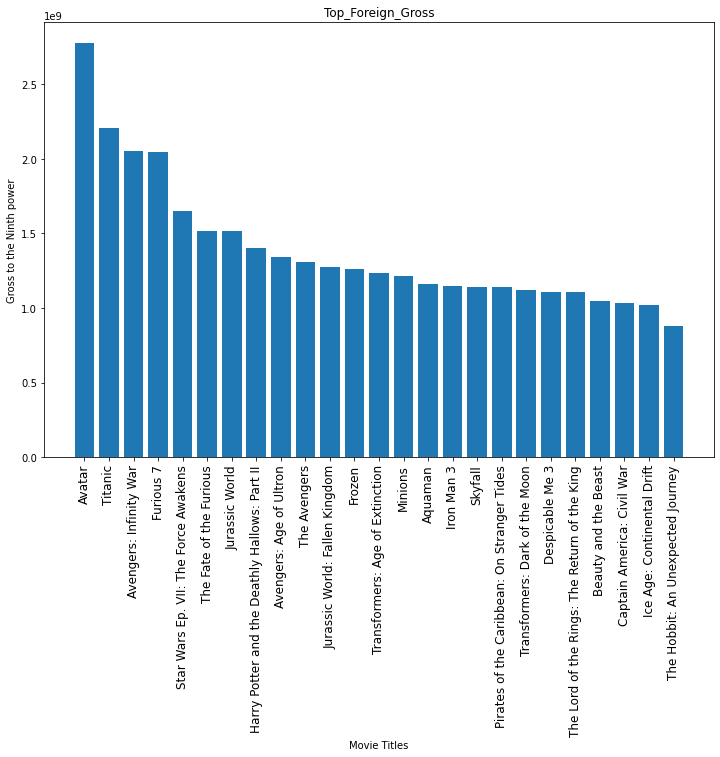

In [49]:

fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(for_gross['movie'], for_gross['fworldwide_gross'].sort_values(ascending = False))

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Gross to the Ninth power')
ax.set_title('Top_Foreign_Gross')

Text(0.5, 1.0, 'Top Domestic Grossing Movies')

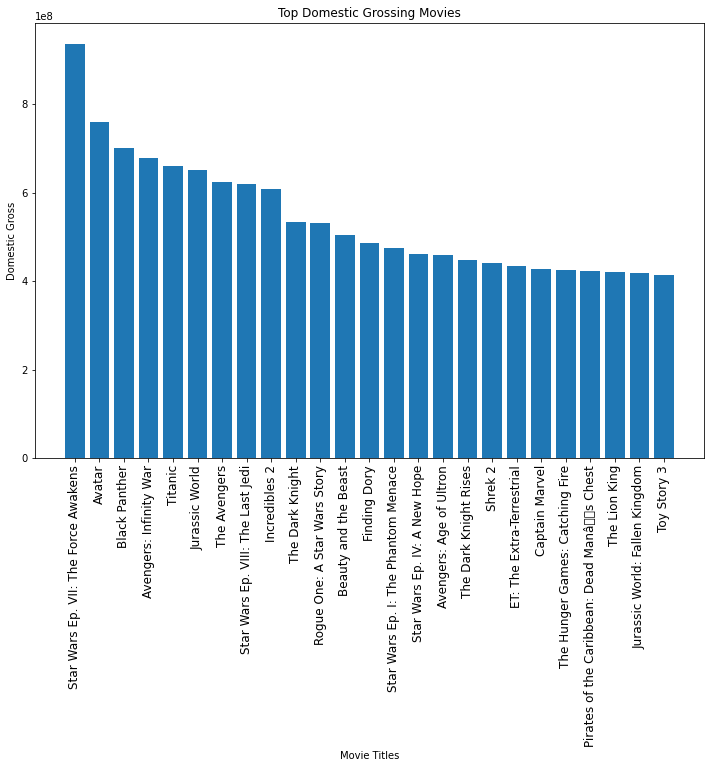

In [54]:
fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(dom_gross['movie'], dom_gross['domestic_gross'])

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Domestic Gross')
ax.set_title('Top Domestic Grossing Movies')



Text(0.5, 1.0, 'Highest Production Budget')

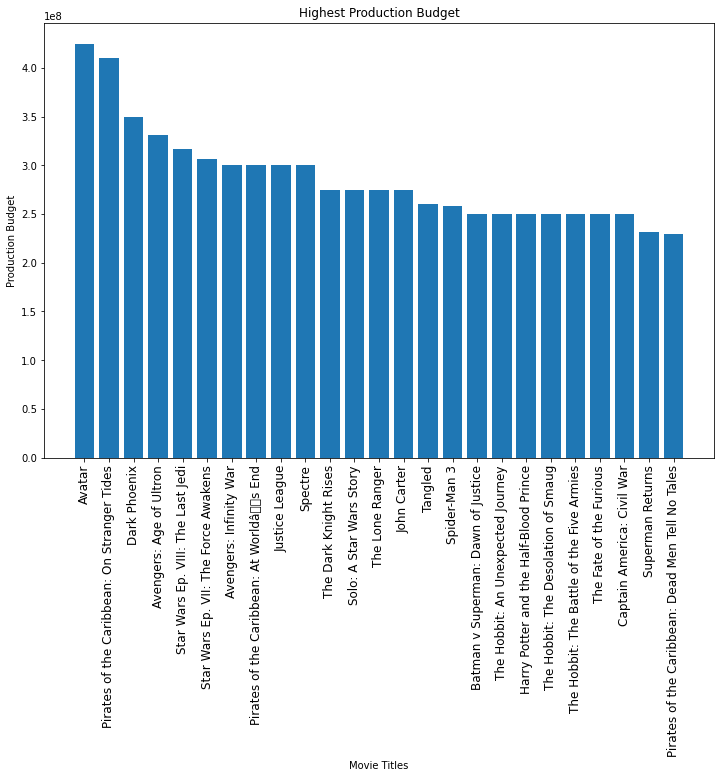

In [51]:
fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(product_budget['movie'], product_budget['production_budget'])

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Production Budget')
ax.set_title('Highest Production Budget')



Text(0.5, 1.0, 'Highest Overall Grossing Movies')

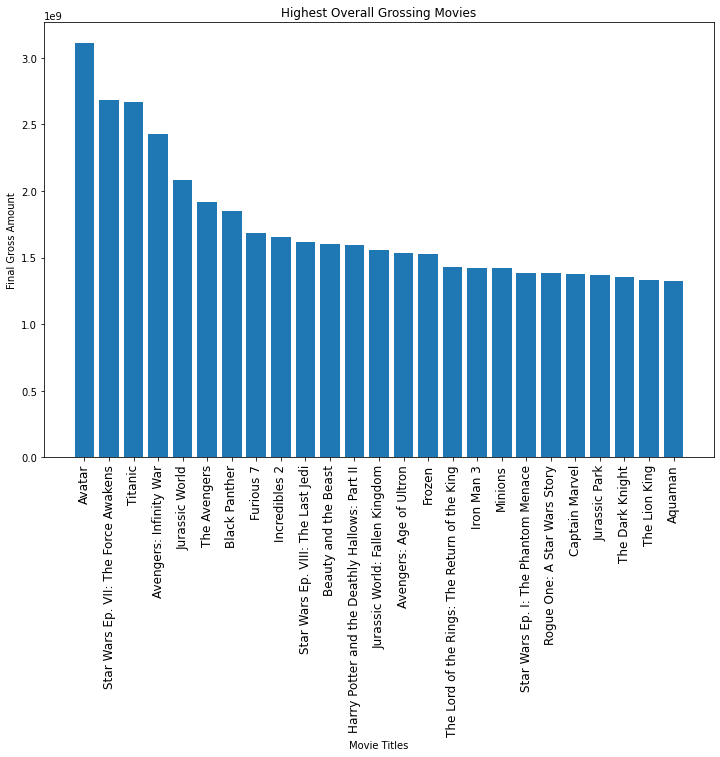

In [56]:
fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(actual_income['movie'], actual_income['actual_income'])

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Final Gross Amount')
ax.set_title('Highest Overall Grossing Movies')



In [147]:
top_10_genre

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64